In [1]:
using Pkg

In [3]:
Pkg.add("SimpleHypergraphs")
Pkg.add("GraphPlot")
Pkg.add("LightGraphs")

  Resolving package versions...
   Updating `~/PROVA/LTMSim.jl/Project.toml`
 [no changes]
   Updating `~/PROVA/LTMSim.jl/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/PROVA/LTMSim.jl/Project.toml`
  [a2cc645c] + GraphPlot v0.5.0
   Updating `~/PROVA/LTMSim.jl/Manifest.toml`
  [3da002f7] ↓ ColorTypes v0.11.0 ⇒ v0.10.12
  [a81c6b42] + Compose v0.9.3
  [1a297f60] ↑ FillArrays v0.10.2 ⇒ v0.12.8
  [a2cc645c] + GraphPlot v0.5.0
  Resolving package versions...
   Updating `~/PROVA/LTMSim.jl/Project.toml`
 [no changes]
   Updating `~/PROVA/LTMSim.jl/Manifest.toml`
 [no changes]


In [34]:
using SimpleHypergraphs
using LightGraphs 


In [56]:

h = Hypergraph{Float64}(5,4)
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5

h

5×4 Hypergraph{Float64,Nothing,Nothing,Dict{Int64,Float64}}:
 1.5        nothing   nothing   nothing
 1.5        nothing  3.5        nothing
 1.5        nothing   nothing  2.5
  nothing   nothing  4.5       4.5
  nothing  6.5        nothing  5.5

In [57]:
SimpleHypergraphs.draw(h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #wheter displaying or not node labels
    with_node_metadata_hover=true,
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div4\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"1\":1.5},{\"3\":3.5,\"1\":1.5},{\"4\":2.5,\"1\":1.5},{\"4\":4.5,\"3\":4.5},{\"4\":5.5,\"2\":6.5}],\n            [{\"2\":1.5,\"3\":1.5,\"1\":1.5},{\"5\":6.5},{\"4\":4.5,\"2\":3.5},{\"4\":4.5,\"3\":2.5,\"5\":5.5}],\n            \"div4\",\n            vmeta=[null,null,null,null,null],\n            hemeta=[null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

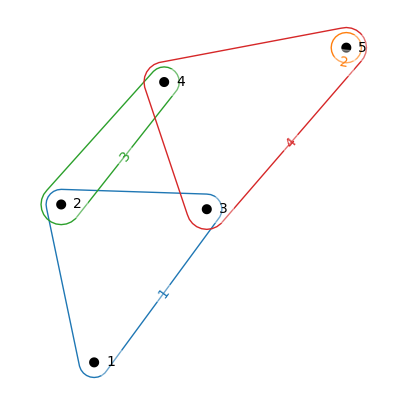

In [58]:
draw(h, HyperNetX; width=5, height=5, no_border=true)

In [59]:
b = BipartiteView(h)

{9, 9} undirected simple Int64 graph

In [60]:
supertype(typeof(b))

Graphs.SimpleGraphs.AbstractSimpleGraph{Int64}

In [61]:
SimpleHypergraphs.add_vertex!(h)

6

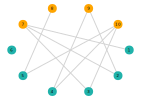

In [66]:
using GraphPlot
using LightGraphs
nodes, hyperedges = size(h)
nodes_membership = fill(1, nodes)
hyperedges_membership = fill(2, hyperedges)

membership = vcat(nodes_membership, hyperedges_membership)

nodecolor = ["lightseagreen", "orange"]
#membership color
nodefillc = nodecolor[membership]

gplot(b, nodefillc=nodefillc, nodelabel=1:SimpleHypergraphs.nv(b), layout=circular_layout)

In [63]:
@assert SimpleHypergraphs.has_overlapping_hedges(h) == false

In [64]:
t = TwoSectionView(h)

{6, 7} undirected simple Int64 graph

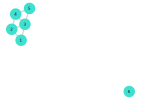

In [65]:
gplot(t, nodelabel=1:SimpleHypergraphs.nv(t))

In [67]:
h = Hypergraph{Float64}(8,7)
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5
h[5,5] = 5.5
h[5,6] = 6.5
h[6,7] = 5.5
h[7,7] = 6.5
h[8,7] = 6.5
h[8,6] = 6.5

6.5

In [68]:
best_comm = findcommunities(h, CFModularityCNMLike(100))

display(best_comm.bm)

display(best_comm.bp)

0.24685714285714283

4-element Array{Set{Int64},1}:
 Set([4, 2, 3, 1])
 Set([7])
 Set([6])
 Set([8, 5])

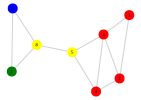

In [71]:
t = TwoSectionView(h)

function get_color(i, bp)
    color = ["red","green","blue","yellow"]
    for j in 1:length(bp)
        if i in bp[j]
            return color[j]
        end
    end
    return "black"
end

gplot(t, nodelabel=1:SimpleHypergraphs.nv(t), nodefillc=get_color.(1:SimpleHypergraphs.nv(t), Ref(best_comm.bp) ))